A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report 
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor

In [2]:
sale = pd.read_csv("/content/Company_Data.csv")
sale.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


# **EDA**

In [6]:
sale=pd.get_dummies(sale,columns=['Urban','US'], drop_first=True)

In [8]:
sale.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0


In [9]:
sale['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [13]:
label_encoder = preprocessing.LabelEncoder()
sale['ShelveLoc'] = label_encoder.fit_transform(sale['ShelveLoc'])

In [14]:
sale.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [15]:
sale["ShelveLoc"].value_counts()

2    219
0     96
1     85
Name: ShelveLoc, dtype: int64

Spliting Variables

In [18]:
x = sale.iloc[:,0:6]
y = sale.iloc[:,6]

In [19]:
x 

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [20]:
y

0      0
1      1
2      2
3      2
4      0
      ..
395    1
396    2
397    2
398    0
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [21]:
colnames = list(sale.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [24]:
x_train

,Sales,CompPrice,Income,Advertising,Population,Price
336,5.17,138,35,6,60,143
64,7.80,100,67,12,184,104
55,6.85,143,81,5,60,154
106,0.16,102,33,0,217,139
300,8.57,116,78,1,158,99
...,...,...,...,...,...,...
323,10.36,107,105,18,428,103
192,7.56,108,26,0,408,93
117,8.80,145,53,0,507,119
47,4.38,126,98,0,173,108


In [25]:
y_train

336    0
64     2
55     2
106    2
300    2
      ..
323    2
192    2
117    2
47     0
172    1
Name: ShelveLoc, Length: 320, dtype: int64

In [27]:
y_test.shape

(80,)

# Building Decision Tree Classifier using Entropy Criteria

In [28]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

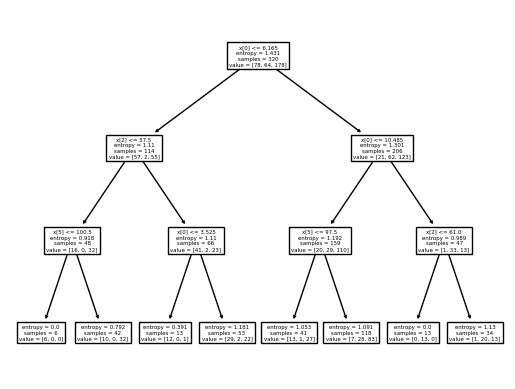

In [29]:
tree.plot_tree(model);

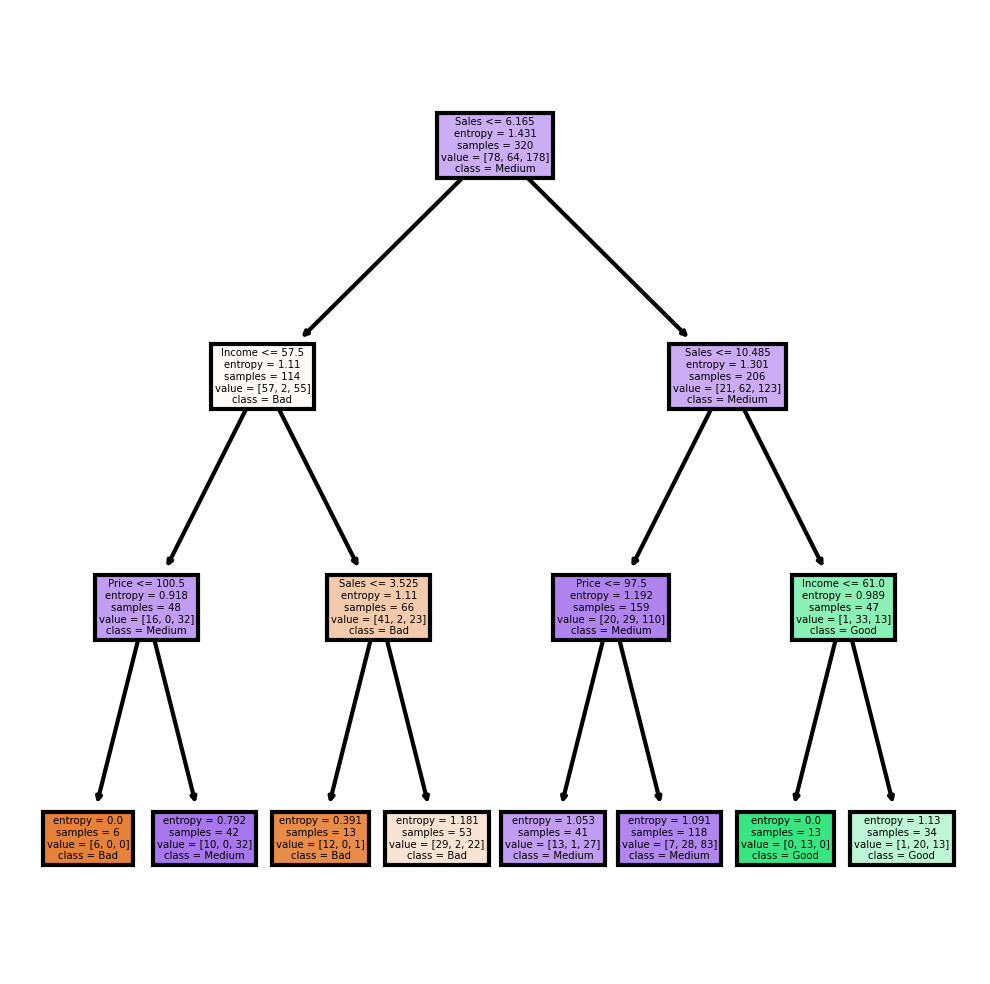

In [31]:
fn=['Sales','CompPrice','Income','Advertising','Population','Price']
cn=['Bad', 'Good', 'Medium']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [33]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

2    52
1    15
0    13
dtype: int64

In [34]:
preds

array([2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1,
       0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1])

In [35]:
pd.crosstab(y_test,preds)

col_0,0,1,2
ShelveLoc,,,
0,5,2,11
1,0,11,10
2,8,2,31


In [37]:
#Accuracy
np.mean(preds==y_test)

0.5875

# Building Decision Tree (CART) using Gini Criteria




In [40]:
model_gini = DecisionTreeClassifier(criterion = 'gini',max_depth=3)

In [41]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [42]:
pred = model_gini.predict(x_test)
np.mean(pred==y_test)

0.6125